number of steps and H are 25 0.04


Enter time step (not zero):  0.000075


time step is: 0.000075
Iteration = 0 Energy = 23.774868586737693
Iteration = 4 Energy = 5033.616738421092
Iteration = 8 Energy = 4826.300507410032
Iteration = 12 Energy = 4667.566574564215
Iteration = 16 Energy = 4547.547005579923
Iteration = 20 Energy = 4451.961255425508
Iteration = 24 Energy = 4372.737571551391
Iteration = 28 Energy = 4304.992841850694
Iteration = 32 Energy = 4245.611639095398
Iteration = 36 Energy = 4192.519065121064
Iteration = 40 Energy = 4144.282900363743
Iteration = 44 Energy = 4099.883986695721
Iteration = 48 Energy = 4058.577786982733
Iteration = 52 Energy = 4019.807785731688
Iteration = 56 Energy = 3983.1495651146347
Iteration = 60 Energy = 3948.2736627973613
Iteration = 64 Energy = 3914.920278897724
Iteration = 68 Energy = 3882.881660604398
Iteration = 72 Energy = 3851.9895827232995
Iteration = 76 Energy = 3822.106285258719
Iteration = 80 Energy = 3793.117803364433
Iteration = 84 Energy = 3764.92898326529
Iteration = 88 Energy = 3737.4597062701973
Iteration 

/home/class/ASK_program/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


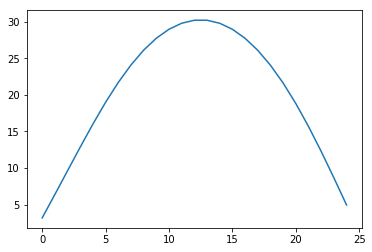

In [4]:
from matplotlib import cm
import matplotlib.pyplot as plt
import cmath, math
import numpy as np

NSTEP = 25                # Total number of domain steps 
H = 1.0/NSTEP             # Spacing
phi = np.zeros(NSTEP)     # Space of PHI
diff = np.zeros(NSTEP)    # Space of Error

print("number of steps and H are", NSTEP, H)

### Function Arrangement
def norm(phi,NSTEP):
    xnorm=0.0
    for i in range(0, NSTEP):
        xnorm = xnorm + (phi[i])**2
        xnorm = math.sqrt(NSTEP/xnorm)
    for i in range(0, NSTEP):
        phi[i] = phi[i]*xnorm
    return phi

### Calculation
dt = input("Enter time step (not zero): ")
print("time step is:", dt)

dt = float(dt)

if dt == 0:
    print("dt is zero and program is stopping")
    quit()

dth=dt/H**2
for i in range(0,NSTEP):
    x = i*H
    phi[i]=x*(1.0-x)

phi=norm(phi,NSTEP)

for i in range(0,100):
    pold=0
    for j in range(0,NSTEP-1):
        pnew = phi[j] + dth * (pold + phi[j+1] - 2*phi[j])
        pold = phi[j]
        phi[j] = pnew
    phi = norm(phi, NSTEP)
    if (i % 4) == 0:
        E = 0.0
        for k in range(0,NSTEP):
            E = E + (phi[k] - phi[k-1])**2
        E = E / H
        print("Iteration =", i, "Energy =", E)
            
### Visualization 
fig = plt.figure()
fig1 = fig.add_subplot(111)
fig1.plot(range(0,NSTEP), phi)
plt.show()
